In [2]:
import pymc3 as pm

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as scistats
from scipy.special import binom

In [5]:
from collections import defaultdict

In [6]:
from functools import reduce

In [7]:
import seaborn as sb

In [8]:
# this function computes the discretized lognormal probabilities for a certain range. It uses integral
# over PDF (probability density function) of normal distribution between f(x[i]) and f(x[i+1]), where
# f is the inverse of the transform between normal and lognormal. This integral is
# expressed via CDF (cumulative density function) of the normal distribution
def lognorm_probs(mu, sigma, maxn):
    xs = np.arange(maxn + 1)
    cdfs = np.zeros_like(xs, dtype = float)
    cdfs[xs > 0] = scistats.norm.cdf((np.log(xs[xs > 0]) - mu) / sigma)
    return cdfs[1:] - cdfs[:-1]

In [9]:
# -*- coding: utf-8 -*-

import codecs

def get_basic_phoneme(phoneme):
	if phoneme[-1].isdigit():
		return phoneme[:-1]
	return phoneme

def get_phonemes(phonemes_code):
	return tuple([get_basic_phoneme(phoneme_code) for phoneme_code in phonemes_code.split(';')])

def get_pg_pair(pg_pair_code):
	phonemes_code, grapheme = pg_pair_code.split('>')
	return (get_phonemes(phonemes_code), grapheme)

def get_mapping(mapping_code):
	return tuple([get_pg_pair(pg_pair_code) for pg_pair_code in mapping_code.split('|')])

def read_phonix(input_file_name):
	phonix = []
	with codecs.open(input_file_name, encoding = 'utf-8') as input_file:
		for line in input_file:
			line = line.strip()
			if not line: continue
			word, mapping_code = line.split(' ')
			phonix.append((word, get_mapping(mapping_code)))
	return phonix

def pg_pair_to_str(pg_pair):
	phonemes, grapheme = pg_pair
	return '%s>%s' % (';'.join(phonemes), grapheme)

def mapping_to_str(mapping):
	return '|'.join(pg_pair_to_str(pg_pair) for pg_pair in mapping)

In [10]:
def read_freq_list(freq_file_name):
    wordfreqs = {}
    with open(freq_file_name) as input_file:
        for line in input_file:
            line = line.strip()
            word, freq = line.split(' ')
            freq = float(freq)
            wordfreqs[word] = freq
    return wordfreqs

In [11]:
phonix = read_phonix('../data/phonix.txt')

In [12]:
phonix_dict = dict(phonix)

In [13]:
wordfreqs = read_freq_list('../data/word-freqs.txt')

In [14]:
def normalize(distr):
    denominator = sum(distr.values())
    return {key: float(value) / denominator for key, value in distr.items()}

In [15]:
def get_pg_freqs(wordfreqs, phonix):
    aggregator = defaultdict(float)
    for word, mapping in phonix:
        if word not in wordfreqs: continue
        wordfreq = wordfreqs[word]
        for pg in mapping:
            aggregator[pg_pair_to_str(pg)] += wordfreq
    return normalize(aggregator)

In [16]:
pg_freqs = get_pg_freqs(wordfreqs, phonix)

In [17]:
pgs = sorted(pg_freqs.keys(), key = lambda pg: pg_freqs[pg], reverse=True) # just wanted to sort it to have an intuitive ordering of pg-pairs
ps = np.array([pg_freqs[pg] for pg in pgs])

In [18]:
pg_idx = {pg : i for i, pg in enumerate(pgs)}

In [19]:
pgs

['t>t',
 'n>n',
 'ɪ>i',
 'd>d',
 'æ>a',
 's>s',
 'r>r',
 'i>e',
 'ð>th',
 'l>l',
 'ɛ>e',
 'h>h',
 'm>m',
 'z>s',
 'w>w',
 'ʌ>a',
 'b>b',
 'f>f',
 'ɝ>er',
 'p>p',
 'ɔ>o',
 'ʌ>u',
 'k>c',
 'oʊ>o',
 'i>y',
 'ʌ>o',
 'u>o',
 'ŋ>ng',
 'g>g',
 'ɪ>e',
 'aɪ>i',
 'ɑ>o',
 'l>ll',
 'eɪ>a',
 'θ>th',
 'v>f',
 'v>v',
 'ʃ>sh',
 'k>k',
 'r>re',
 'j>y',
 'i>ee',
 'ɑ>a',
 'w>wh',
 'v>ve',
 'aʊ>ou',
 'ɝ>or',
 'd>ed',
 'tʃ>ch',
 'm>me',
 'ɔ>a',
 'u>ou',
 'ʌ;l>le',
 'eɪ>ay',
 'i>ea',
 'aɪ>y',
 's>ce',
 'ʊ>ou',
 'n>ne',
 't>tt',
 'aʊ>ow',
 'ʊ>oo',
 'oʊ>ow',
 'ɛ>ai',
 't>ed',
 's>ss',
 'ɛ>a',
 'd>ld',
 'k>ck',
 'dʒ>j',
 'k>ke',
 'eɪ>ai',
 'z>se',
 'ɛ>ea',
 'aɪ>igh',
 'ŋ>n',
 'eɪ>ey',
 'u>oo',
 'w;ʌ>o',
 't>te',
 's>c',
 'ʌ>ou',
 'ɝ>ur',
 'p>pp',
 's>se',
 'ɝ>ir',
 'i>ie',
 'd>de',
 'n>kn',
 'ɪ>ea',
 'ɝ>ere',
 'h>wh',
 'w>u',
 'i>i',
 'u>u',
 'r>rr',
 'k>q',
 'k;s>x',
 'l>le',
 'ʊ>u',
 'dʒ>ge',
 'f>ff',
 'ʃ>ti',
 'dʒ>g',
 'ɔ>au',
 'ɝ>ear',
 'j;u>ew',
 'n>nn',
 'd>dd',
 'j;u>u',
 'ɔ>ough',
 'ɝ>ar',
 'ɛ>ei',
 'ɔ

In [20]:
observations = [("cat", True), ('tiger', True), ("tree", True), ("dinosaur", False)]

In [21]:
#prior specifies our prior belief regarding how much pg-pairs the child could have been exposed to
prior_mu = np.log(1500) # means that the median pg-pair exposure in our prior belief is 500
prior_sigma = 3 # specifies how spreaded the prior is. For the actual modeling, we want it to be 
                  # quite spreaded. So, the value around 2-3 shall be best. I put it small here to better
                  # show how prior belief can influence our posterior belief.

In [22]:
p_th = 0.01 # probability of our target pg-pair, derived from corpus
n_th_observed = 50 # how much the kid saw this pg-pair
#observations = torch.tensor([n_th_observed])

In [23]:
def word_pgs(word):
    return [pg_pair_to_str(pg) for pg in phonix_dict[word]]

In [24]:
def observed_pgs(observations):
    pgs = set()
    for word, obs in observations:
        pgs.update(word_pgs(word))
    return pgs

In [25]:
observed_pgs(observations)

{'aɪ>i',
 'd>d',
 'g>g',
 'i>ee',
 'k>c',
 'n>n',
 'r>r',
 's>s',
 't>t',
 'æ>a',
 'ɔ>au',
 'ɝ>er',
 'ʌ>o'}

In [35]:
with pm.Model() as model:
    log_n = pm.Normal("log_n_pg_exposed", mu = prior_mu, sigma = prior_sigma)
    n = np.exp(log_n)
    probs_recall = dict()
    for pg in observed_pgs(observations):
        p = ps[pg_idx[pg]]
        varname = "n_" + pg
        print(varname)
        n_pg = pm.TruncatedNormal(varname, mu = n * p, sigma = np.sqrt(n * p * (1 - p)), lower = 0)
        probs_recall[pg] = 1 - np.exp(-0.3 * n_pg)
    for i, (word, recall) in enumerate(observations):
        varname = "obs_%d" % i
        print(varname)
        the_word_pgs = word_pgs(word)
        p = reduce(lambda x, y: x * y, map(lambda pg: probs_recall[pg], the_word_pgs))
        pm.Bernoulli(varname, p = p, observed = recall)

n_t>t
n_æ>a
n_s>s
n_ʌ>o
n_r>r
n_i>ee
n_n>n
n_ɔ>au
n_k>c
n_g>g
n_d>d
n_aɪ>i
n_ɝ>er
obs_0
obs_1
obs_2
obs_3


In [36]:
with model:
    # draw 500 posterior samples
    trace = pm.sample(tune = 1000, draws = 1000, return_inferencedata=False, target_accept = 0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n_ɝ>er, n_aɪ>i, n_d>d, n_g>g, n_k>c, n_ɔ>au, n_n>n, n_i>ee, n_r>r, n_ʌ>o, n_s>s, n_æ>a, n_t>t, log_n_pg_exposed]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 65 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [37]:
divergent = trace['diverging']
print('Number of Divergent %d' % divergent.nonzero()[0].size)
divperc = divergent.nonzero()[0].size / len(trace) * 100
print('Percentage of Divergent %.1f' % divperc)

Number of Divergent 36
Percentage of Divergent 3.6


/usr/local/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'log_n_pg_exposed'}>,
        <AxesSubplot:title={'center':'log_n_pg_exposed'}>],
       [<AxesSubplot:title={'center':'n_t>t'}>,
        <AxesSubplot:title={'center':'n_t>t'}>],
       [<AxesSubplot:title={'center':'n_æ>a'}>,
        <AxesSubplot:title={'center':'n_æ>a'}>],
       [<AxesSubplot:title={'center':'n_s>s'}>,
        <AxesSubplot:title={'center':'n_s>s'}>],
       [<AxesSubplot:title={'center':'n_ʌ>o'}>,
        <AxesSubplot:title={'center':'n_ʌ>o'}>],
       [<AxesSubplot:title={'center':'n_r>r'}>,
        <AxesSubplot:title={'center':'n_r>r'}>],
       [<AxesSubplot:title={'center':'n_i>ee'}>,
        <AxesSubplot:title={'center':'n_i>ee'}>],
       [<AxesSubplot:title={'center':'n_n>n'}>,
        <AxesSubplot:title={'center':'n_n>n'}>],
       [<AxesSubplot:title={'center':'n_ɔ>au'}>,
        <AxesSubplot:title={'center':'n_ɔ>au'}>],
       [<AxesSubplot:title={'center':'n_k>c'}>,
        <AxesSubplot:title={'center':'n_k>c'}>],
    

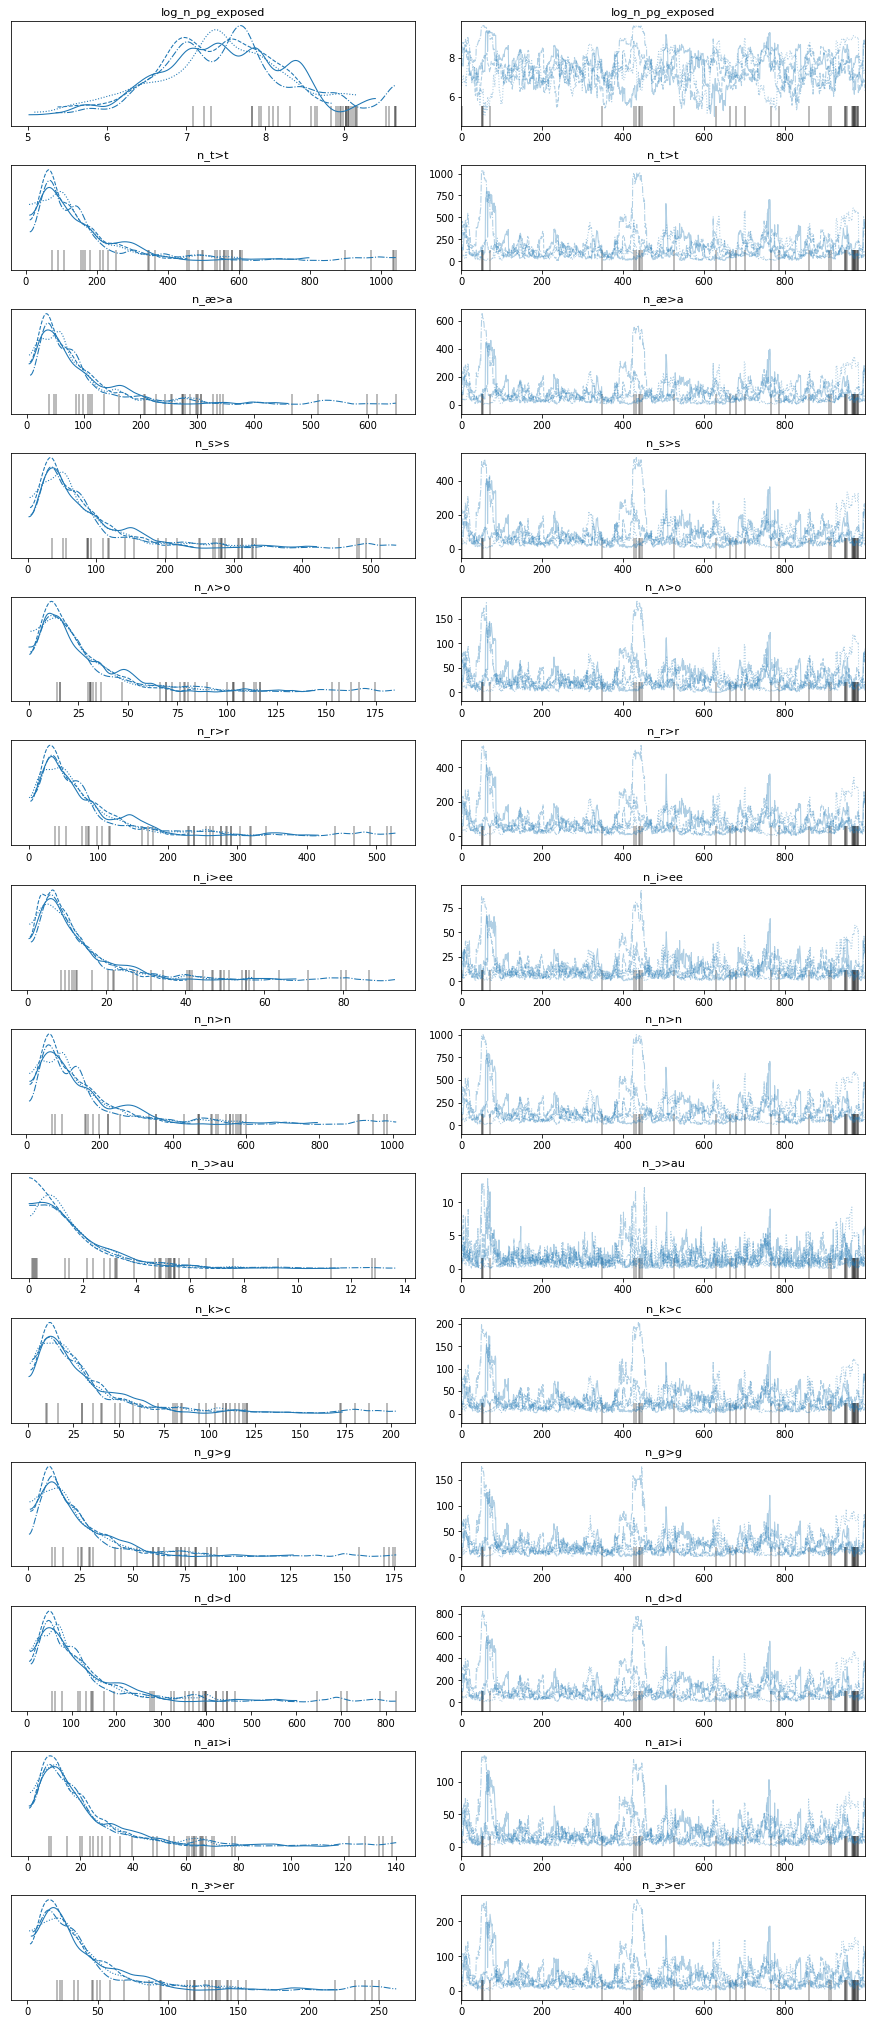

In [38]:
pm.traceplot(trace)

In [39]:
pm.rhat(trace)

/usr/local/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<xarray.Dataset>
Dimensions:           ()
Data variables:
    log_n_pg_exposed  float64 1.024
    n_t>t             float64 1.029
    n_æ>a             float64 1.027
    n_s>s             float64 1.028
    n_ʌ>o             float64 1.028
    n_r>r             float64 1.027
    n_i>ee            float64 1.026
    n_n>n             float64 1.029
    n_ɔ>au            float64 1.021
    n_k>c             float64 1.025
    n_g>g             float64 1.027
    n_d>d             float64 1.029
    n_aɪ>i            float64 1.025
    n_ɝ>er            float64 1.024

In [191]:
ps[pg_idx['t>t']]

0.06485654203053876